# Preprocessing<a id='Preprocessing'>

## Table of Contents<a id='Table_of_Contents'>

* [Preprocessing](#Preprocessing)
  * [Table of Contents](#Table_of_Contents)
  * [Imports](#Imports)
  * [Load The Data](#Load_the_Data)
  * [Merge DataFrames](#Merge_DataFrames)
  * [Create Dummy Columns](#Create_Dummy_Columns)
  * [Train Test Split](#Train_Test_Split)
  * [Scale the Data](#Scale_the_Data)
* [Modeling](#Modeling)
  * [Modeling - Random Forest](#Modeling_RF)
  * [Modeling - SVM](#Modeling-SVM)
  * [Modeling - Deep Learning](#Modeling_Deep_Learning)

## Imports <a id='Imports'>

Let's import the necessary packages for this notebook. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier

In [2]:
#CONTSTANTS
class_names = ["G", "PG", "PG-13", "R", "TV-14", "TV-G", "TV-MA", "TV-PG", "TV-Y7"] 

In [3]:
#FUNCTIONS
def clean_confusion_matrix(columns, conf_matrix):
    plt.clf()
    class_labels_list = columns

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels_list, yticklabels=class_labels_list)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix - Test Set')
    plt.show()

## Load the Data <a id='Load_the_Data'>

Let's load the data. 

In [4]:
#Load
tags = pd.read_csv('data/clean_data/cleaned_tags.csv')
movies = pd.read_csv('data/clean_data/cleaned_movies.csv')
movie_tags = pd.read_csv('data/clean_data/cleaned_movie_tags.csv')

In [5]:
tags

,category,tag_name,title,description
0,language,profanity,Profanity,NaN
1,language,blasphemy,Blasphemy,NaN
2,language,sexual_reference,Sexual References and Innuendos,"Any references or jokes about sex, flirting, i..."
3,language,childish_language,Childish Language,"Generally, things you would not want your 3-ye..."
4,language,racial_slurs,Racial Slurs and Bigoted Language,"Racist, sexist, and/or discriminatory language..."
5,violence,non_graphic,Non-Graphic,Violence without blood.
6,violence,graphic,Graphic,Violence with blood or breaking bones.
7,violence,disturbing_images,Disturbing Images,"Dead bodies, severed body parts, or object pro..."
8,violence,gore,Gore,"Gore, bloody guts, bloody severed body parts."
9,violence,violence_implied,Implied Violence,The violence is not seen on screen. Graphic de...


In [6]:
movies

,imdb_id,name,year,mpaa_rating,duration_sec,studio,number_of_studios
0,tt11274492,The Out-Laws,2023,R,5700,Happy Madison Productions,1
1,tt12263384,Extraction 2,2023,R,7380,Other|AGBO,2
2,tt16419074,Air,2023,R,6720,Other|Skydance,2
3,tt14400246,Bird Box Barcelona,2023,TV-MA,7440,Nostromo Pictures|Other|Other|Other,4
4,tt1745960,Top Gun: Maverick,2022,PG-13,7860,Paramount|Jerry Bruckheimer Films|Other|Tencen...,5
...,...,...,...,...,...,...,...
1724,tt6902676,Guns Akimbo,2020,R,5700,Ingenious Media|Other|Other|Other|Other|Other|...,8
1725,tt3813310,Cop Car,2015,R,5280,Universal Pictures,1
1726,tt2091935,Mr. Right,2016,R,5700,Focus,1
1727,tt13372794,The Manor,2021,TV-MA,4860,Amazon Studios|Blumhouse Television,2


In [7]:
movie_tags

,imdb_id,category,tag_name,occurrence_cnt,duration_sec
0,tt0052357,language,blasphemy,1,0.1
1,tt0052357,violence,non_graphic,5,30.0
2,tt0052357,violence,disturbing_images,1,0.1
3,tt0052357,immodesty,immodesty,1,6.0
4,tt0052357,immodesty,nudity_implied,1,30.0
...,...,...,...,...,...
23975,tt9902160,violence,non_graphic,9,18.0
23976,tt9902160,violence,graphic,4,12.0
23977,tt9902160,immodesty,immodesty,3,30.0
23978,tt9902160,sexual,sexually_suggestive,1,6.0


Everything looks to be how we had saved it from the previous notebook, but one thing we want to do first is remove any Not Rated movies from our movies dataframe. This is because those are movies that have not been submitted for rating, so they won't help in predicting ratings. They may be good to run as further tests for our model later on. Let's first save our Not Rated movies. 

In [8]:
not_rated_movies = movies[movies['mpaa_rating']== 'NR'] 
not_rated_movies

,imdb_id,name,year,mpaa_rating,duration_sec,studio,number_of_studios
374,tt2938042,The Ride,2012,NR,1943,Angel Studios,1
532,tt8046730,Kevin Bozeman: Clean and Unfiltered,2017,NR,2760,Angel Studios,1
648,tt3986820,The Endless,2017,NR,6720,Other|Other|Other|Other,4
778,tt6259380,Code 8,2019,NR,5940,Téléfilm Canada|XYZ Films|The Fyzz|Other|Other...,6
841,tt14217100,Ferry,2021,NR,6360,Other,1
981,tt1680140,The Stolen,2017,NR,5880,Other,1
1013,tt9207700,Made in Italy,2020,NR,5640,Other|Other|Other,3
1032,tt5657712,I'm Not Here,2019,NR,4860,Other,1
1169,tt2736858,The Harrowing,2018,NR,6600,Other|Other|Other,3
1171,tt5073652,Married By Christmas,2016,NR,5160,Other,1


There are 24 Not Rated movies. We will now filter our movies dataframe to not include these 24. There were originally 1729 rows in the movies dataframe, so we would expect 1705 after we remove the Not Rated ones. 

In [9]:
movies = movies[movies['mpaa_rating']!= 'NR'] 
movies

,imdb_id,name,year,mpaa_rating,duration_sec,studio,number_of_studios
0,tt11274492,The Out-Laws,2023,R,5700,Happy Madison Productions,1
1,tt12263384,Extraction 2,2023,R,7380,Other|AGBO,2
2,tt16419074,Air,2023,R,6720,Other|Skydance,2
3,tt14400246,Bird Box Barcelona,2023,TV-MA,7440,Nostromo Pictures|Other|Other|Other,4
4,tt1745960,Top Gun: Maverick,2022,PG-13,7860,Paramount|Jerry Bruckheimer Films|Other|Tencen...,5
...,...,...,...,...,...,...,...
1724,tt6902676,Guns Akimbo,2020,R,5700,Ingenious Media|Other|Other|Other|Other|Other|...,8
1725,tt3813310,Cop Car,2015,R,5280,Universal Pictures,1
1726,tt2091935,Mr. Right,2016,R,5700,Focus,1
1727,tt13372794,The Manor,2021,TV-MA,4860,Amazon Studios|Blumhouse Television,2


We have successfully removed the Not Rated movies from our movies dataframe. Now we can merge out main two Dataframes (movies and movie_tags) into one to get it ready for Modeling. 

## Merge DataFrames <a id='Merge_DataFrames'>

In order to merge the DataFrames, we will need to perform a pivot to movie_tags to create dummy columns for each unique combination of category and tag_name using a multi=index of category and tag_name. Then we can flatten the multi-index into one column separated by an '_' and removing any leading and trailing white space. 

Now that we have all of our tags together on the same row in the same column, we can then merge to the movies dataframe using the imdb_id to get everything in one big dataframe for our model. 

In [10]:
# Pivot the movie_tags dataframe to get dummy columns for each unique combination of category and tag_name
pivot_tags_df = movie_tags.pivot_table(index='imdb_id', columns=['category', 'tag_name'], values=['occurrence_cnt', 'duration_sec'], aggfunc='first')

# Flatten the MultiIndex columns
pivot_tags_df.columns = ['_'.join(col).strip() for col in pivot_tags_df.columns.values]

# Merge 'movies' with the pivoted tags DataFrame
merged_df = pd.merge(movies, pivot_tags_df, on='imdb_id', how='left')

# Fill NaN values with zeros
merged_df = merged_df.fillna(0)

merged_df

,imdb_id,name,year,mpaa_rating,duration_sec,studio,number_of_studios,duration_sec_drugs_drugs_illegal,duration_sec_drugs_drugs_implied,duration_sec_drugs_drugs_legal,...,occurrence_cnt_sexual_sex_implied,occurrence_cnt_sexual_sex_with_nudity,occurrence_cnt_sexual_sex_without_nudity,occurrence_cnt_sexual_sexual_assault,occurrence_cnt_sexual_sexually_suggestive,occurrence_cnt_violence_disturbing_images,occurrence_cnt_violence_gore,occurrence_cnt_violence_graphic,occurrence_cnt_violence_non_graphic,occurrence_cnt_violence_violence_implied
0,tt11274492,The Out-Laws,2023,R,5700,Happy Madison Productions,1,0.1,0.0,0.0,...,1.0,0.0,1.0,0.0,9.0,0.0,0.0,11.0,32.0,0.0
1,tt12263384,Extraction 2,2023,R,7380,Other|AGBO,2,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,65.0,75.0,0.0
2,tt16419074,Air,2023,R,6720,Other|Skydance,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
3,tt14400246,Bird Box Barcelona,2023,TV-MA,7440,Nostromo Pictures|Other|Other|Other,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,57.0,37.0,0.0
4,tt1745960,Top Gun: Maverick,2022,PG-13,7860,Paramount|Jerry Bruckheimer Films|Other|Tencen...,5,0.0,0.0,0.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,tt6902676,Guns Akimbo,2020,R,5700,Ingenious Media|Other|Other|Other|Other|Other|...,8,12.0,0.0,0.0,...,1.0,0.0,1.0,0.0,3.0,31.0,6.0,102.0,57.0,0.0
1701,tt3813310,Cop Car,2015,R,5280,Universal Pictures,1,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,5.0,1.0
1702,tt2091935,Mr. Right,2016,R,5700,Focus,1,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,6.0,0.0,0.0,31.0,39.0,0.0
1703,tt13372794,The Manor,2021,TV-MA,4860,Amazon Studios|Blumhouse Television,2,0.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,3.0,8.0,0.0


We can confirm it has pulled successfully looking at a movie that has multiple tags. We will use imdb_id tt0052357 which has 8 total tags in the movie_tags dataframe. 

In [11]:
movie_tags[movie_tags['imdb_id']=='tt0052357']

,imdb_id,category,tag_name,occurrence_cnt,duration_sec
0,tt0052357,language,blasphemy,1,0.1
1,tt0052357,violence,non_graphic,5,30.0
2,tt0052357,violence,disturbing_images,1,0.1
3,tt0052357,immodesty,immodesty,1,6.0
4,tt0052357,immodesty,nudity_implied,1,30.0
5,tt0052357,sexual,kissing_normal,13,108.0
6,tt0052357,drugs,drugs_legal,14,36.0
7,tt0052357,drugs,drugs_implied,1,6.0


We will filter the merged dataframe for that specific movie id of tt0052357. Then we will only include all the new rows for duration and occurrence for each tag and category. Then we will return any rows that are not 0 to see what is populated. 

In [12]:
# Filter the DataFrame to include only rows with 'imdb_id' equal to 'tt0052357'
filtered_df = merged_df[merged_df['imdb_id'] == 'tt0052357']

# Select numeric columns
numeric_columns = filtered_df.iloc[:,7:]

# Select columns with values greater than 0
filtered_df = numeric_columns.loc[:, (numeric_columns > 0).any()]

filtered_df

,duration_sec_drugs_drugs_implied,duration_sec_drugs_drugs_legal,duration_sec_immodesty_immodesty,duration_sec_immodesty_nudity_implied,duration_sec_language_blasphemy,duration_sec_sexual_kissing_normal,duration_sec_violence_disturbing_images,duration_sec_violence_non_graphic,occurrence_cnt_drugs_drugs_implied,occurrence_cnt_drugs_drugs_legal,occurrence_cnt_immodesty_immodesty,occurrence_cnt_immodesty_nudity_implied,occurrence_cnt_language_blasphemy,occurrence_cnt_sexual_kissing_normal,occurrence_cnt_violence_disturbing_images,occurrence_cnt_violence_non_graphic
1442,6.0,36.0,6.0,30.0,0.1,108.0,0.1,30.0,1.0,14.0,1.0,1.0,1.0,13.0,1.0,5.0


16 columns are returned which is 8 for the occurrences, and 8 for the duration, so we have successfully merged our dataframes. Let's review the datatypes to make sure it all looks correct. 

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 0 to 1704
Data columns (total 67 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   imdb_id                                      1705 non-null   object 
 1   name                                         1705 non-null   object 
 2   year                                         1705 non-null   int64  
 3   mpaa_rating                                  1705 non-null   object 
 4   duration_sec                                 1705 non-null   int64  
 5   studio                                       1705 non-null   object 
 6   number_of_studios                            1705 non-null   int64  
 7   duration_sec_drugs_drugs_illegal             1705 non-null   float64
 8   duration_sec_drugs_drugs_implied             1705 non-null   float64
 9   duration_sec_drugs_drugs_legal               1705 non-null   float64
 10  

All the new datatypes are floats which is what we would expect. We have 30 active tags that we are using and see 60 columns (30 for duration and 30 for occurrence) so evyerthing looks to be represented. We can move on to our remaining categorical columns to account for them with dummy encoding.  

## Create Dummy Columns <a id='Create_Dummy_Columns'>

The only remaining column that is not a numeric value that we will be using for our model is the studio column. In our Data Cleaning section, we had found that if there are multiple studios associated to a movie, they were separated by |'s. So to start, we will take our studio column and create a new dataframe where each row is a different studio, but a movie may have multiple rows. The columns will have a column for each studio (signified with a prefix of Studio) and each row will be a binary flag if whether a studio exists for that movie. Each row will only have 1 studio on it, which is why a movie would have multiple rows. 

In [14]:
studios  = merged_df['studio'].str.split('|').explode()
dummy_studios = pd.get_dummies(studios, prefix='Studio_', prefix_sep='')
dummy_studios

,Studio_21 Laps Entertainment,Studio_30WEST,Studio_87Eleven Productions,Studio_87North Productions,Studio_A24,Studio_AGBO,Studio_Addictive Pictures,Studio_Aloe Entertainment,Studio_Amazon Studios,Studio_Amblin Entertainment,...,Studio_Vertical Entertainment,Studio_Vinson Films,Studio_Voltage Pictures,Studio_Walden Media,Studio_Weinstein Company,Studio_Will Packer Productions,Studio_Wonderland Sound and Vision,Studio_Working Title Films,Studio_XYZ Films,Studio_Zero Gravity Management
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1703,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that we have all our dummy columns created, we can concat it to our main dataframe so that all the studio columns are added and each movie has a binary flag for whether that studio exists or not for that movie. 

In [15]:
movies_studio_combined = pd.concat([merged_df, dummy_studios.groupby(level=0).sum()], axis=1)
movies_studio_combined

,imdb_id,name,year,mpaa_rating,duration_sec,studio,number_of_studios,duration_sec_drugs_drugs_illegal,duration_sec_drugs_drugs_implied,duration_sec_drugs_drugs_legal,...,Studio_Vertical Entertainment,Studio_Vinson Films,Studio_Voltage Pictures,Studio_Walden Media,Studio_Weinstein Company,Studio_Will Packer Productions,Studio_Wonderland Sound and Vision,Studio_Working Title Films,Studio_XYZ Films,Studio_Zero Gravity Management
0,tt11274492,The Out-Laws,2023,R,5700,Happy Madison Productions,1,0.1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,tt12263384,Extraction 2,2023,R,7380,Other|AGBO,2,0.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,tt16419074,Air,2023,R,6720,Other|Skydance,2,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,tt14400246,Bird Box Barcelona,2023,TV-MA,7440,Nostromo Pictures|Other|Other|Other,4,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,tt1745960,Top Gun: Maverick,2022,PG-13,7860,Paramount|Jerry Bruckheimer Films|Other|Tencen...,5,0.0,0.0,0.1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,tt6902676,Guns Akimbo,2020,R,5700,Ingenious Media|Other|Other|Other|Other|Other|...,8,12.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1701,tt3813310,Cop Car,2015,R,5280,Universal Pictures,1,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1702,tt2091935,Mr. Right,2016,R,5700,Focus,1,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1703,tt13372794,The Manor,2021,TV-MA,4860,Amazon Studios|Blumhouse Television,2,0.1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


We see the number of rows is correct. Let's confirm with imdb_id tt12263384 to make sure both studios are represented. 

In [16]:
# Filter the DataFrame to include only rows with 'imdb_id' equal to 'tt12263384'
filtered_df = movies_studio_combined[movies_studio_combined['imdb_id'] == 'tt12263384']

# Select numeric columns
numeric_columns = filtered_df.iloc[:,67:]

# Select columns with values greater than 0
filtered_df = numeric_columns.loc[:, (numeric_columns > 0).any()]

filtered_df

,Studio_AGBO,Studio_Other
1,1,1


We see both rows are returned so it looks like we have created our dummy columns successfully. Let's check the datatypes for these new columns.

In [17]:
movies_studio_combined.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 0 to 1704
Data columns (total 236 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    imdb_id                                       object 
 1    name                                          object 
 2    year                                          int64  
 3    mpaa_rating                                   object 
 4    duration_sec                                  int64  
 5    studio                                        object 
 6    number_of_studios                             int64  
 7    duration_sec_drugs_drugs_illegal              float64
 8    duration_sec_drugs_drugs_implied              float64
 9    duration_sec_drugs_drugs_legal                float64
 10   duration_sec_immodesty_immodesty              float64
 11   duration_sec_immodesty_nudity_art             float64
 12   duration_sec_immodesty_nudity_implied         

All the new columns have a numeric data type, and there doesn't look to be any duplicate or similar studio names so we have completed creating our combined dataframe. Let's now split the data into training and testing data. 

## Train Test Split<a id='Train_Test_Split'></a>

Now that we have converted all our categorical columns to be numerical and merged all our information between the movies and movie_tags dataframes, we can now create our X and y variables. Our X variable will be all information from movies and movie_tags except for the imdb_id, name, mpaa_rating, and studio columns. We don't need the identifiers which is why we are loosing the imdb_id's and names. Our target variable is the mpaa_rating, so we don't want that in our X, and then studios is dropped because we already split up the original studios column to account for multiple studios. Our y variable is our target variable so that will be based on our mpaa_rating column. Since we have not yet converted mpaa_rating to numerical values, we will also perform the operation to create dummy columns for y as well. 

In [18]:
#Create X and y

X = movies_studio_combined.drop(["imdb_id", 'name','mpaa_rating','studio'], axis=1)
y = pd.get_dummies(movies_studio_combined['mpaa_rating'], drop_first=False)

Let's review our X to see how it looks. 

In [19]:
X

,year,duration_sec,number_of_studios,duration_sec_drugs_drugs_illegal,duration_sec_drugs_drugs_implied,duration_sec_drugs_drugs_legal,duration_sec_immodesty_immodesty,duration_sec_immodesty_nudity_art,duration_sec_immodesty_nudity_implied,duration_sec_immodesty_nudity_without_sex,...,Studio_Vertical Entertainment,Studio_Vinson Films,Studio_Voltage Pictures,Studio_Walden Media,Studio_Weinstein Company,Studio_Will Packer Productions,Studio_Wonderland Sound and Vision,Studio_Working Title Films,Studio_XYZ Films,Studio_Zero Gravity Management
0,2023,5700,1,0.1,0.0,0.0,240.0,0.1,0.0,0.1,...,0,0,0,0,0,0,0,0,0,0
1,2023,7380,2,0.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2023,6720,2,0.0,0.0,0.0,42.0,24.0,0.0,6.0,...,0,0,0,0,0,0,0,0,0,0
3,2023,7440,4,0.0,0.0,0.0,0.0,6.0,0.0,12.0,...,0,0,0,0,0,0,0,0,0,0
4,2022,7860,5,0.0,0.0,0.1,12.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2020,5700,8,12.0,0.0,0.0,6.0,24.0,0.0,12.0,...,0,0,0,0,0,0,0,0,0,0
1701,2015,5280,1,6.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1702,2016,5700,1,0.0,0.0,0.0,102.0,12.0,54.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1703,2021,4860,2,0.1,0.0,0.0,6.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Our X looks how we would expect it to. Let's verify our columns and datatypes. 

In [20]:
X.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 0 to 1704
Data columns (total 232 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    year                                          int64  
 1    duration_sec                                  int64  
 2    number_of_studios                             int64  
 3    duration_sec_drugs_drugs_illegal              float64
 4    duration_sec_drugs_drugs_implied              float64
 5    duration_sec_drugs_drugs_legal                float64
 6    duration_sec_immodesty_immodesty              float64
 7    duration_sec_immodesty_nudity_art             float64
 8    duration_sec_immodesty_nudity_implied         float64
 9    duration_sec_immodesty_nudity_without_sex     float64
 10   duration_sec_language_blasphemy               float64
 11   duration_sec_language_childish_language       float64
 12   duration_sec_language_profanity               

We have all the columns we are expecting with all numeric datatypes. Let's now review y. 

In [21]:
y

,G,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y7
0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1700,0,0,0,1,0,0,0,0,0
1701,0,0,0,1,0,0,0,0,0
1702,0,0,0,1,0,0,0,0,0
1703,0,0,0,0,0,0,1,0,0


Our y has all the ratings as we didn't drop a column when we created the dummy columns. To start, we aren't too worried about any colinearity issues, so we will keep all the columns as it provides more information and easier to understand. Depending on our model performance, that could be an option to help improve performance. 

Now that we have our X and y created, let's split them into training and testing sets for our model to use. 

In [22]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

We used a test size of 20% due to the size of our data. We are also stratifying our y so we can have a relatively even mix of all our classes so we can thoroughly test how it does for each classification. Let's review our X_train data. 

In [23]:
X_train

,year,duration_sec,number_of_studios,duration_sec_drugs_drugs_illegal,duration_sec_drugs_drugs_implied,duration_sec_drugs_drugs_legal,duration_sec_immodesty_immodesty,duration_sec_immodesty_nudity_art,duration_sec_immodesty_nudity_implied,duration_sec_immodesty_nudity_without_sex,...,Studio_Vertical Entertainment,Studio_Vinson Films,Studio_Voltage Pictures,Studio_Walden Media,Studio_Weinstein Company,Studio_Will Packer Productions,Studio_Wonderland Sound and Vision,Studio_Working Title Films,Studio_XYZ Films,Studio_Zero Gravity Management
986,2004,7800,1,0.0,0.0,12.0,180.0,0.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1242,1996,6540,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
615,1999,6480,1,0.0,54.0,6.0,6.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1416,2017,6480,1,0.0,0.0,0.0,288.0,0.0,0.0,48.0,...,0,0,0,0,0,0,0,0,0,0
1467,2020,5940,1,0.0,0.0,0.0,48.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,2011,6720,1,0.0,0.0,30.0,840.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1223,2017,5820,1,0.1,150.0,6.0,0.0,0.0,24.0,60.0,...,0,0,0,0,0,0,0,0,0,0
77,2002,7440,1,0.0,12.0,36.0,6.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1341,2018,7020,1,12.0,6.0,0.0,54.0,6.0,6.0,6.0,...,0,0,0,0,0,0,0,0,0,0


We see the X_train data has around 80% of the original data. Let's make sure we see the remaining 20% in X_test. 

In [24]:
X_test

,year,duration_sec,number_of_studios,duration_sec_drugs_drugs_illegal,duration_sec_drugs_drugs_implied,duration_sec_drugs_drugs_legal,duration_sec_immodesty_immodesty,duration_sec_immodesty_nudity_art,duration_sec_immodesty_nudity_implied,duration_sec_immodesty_nudity_without_sex,...,Studio_Vertical Entertainment,Studio_Vinson Films,Studio_Voltage Pictures,Studio_Walden Media,Studio_Weinstein Company,Studio_Will Packer Productions,Studio_Wonderland Sound and Vision,Studio_Working Title Films,Studio_XYZ Films,Studio_Zero Gravity Management
631,2011,5520,1,66.0,0.0,0.0,168.0,0.0,0.0,72.0,...,0,0,0,0,0,0,0,0,0,0
22,1985,6960,1,48.0,48.0,24.0,120.0,18.0,0.0,0.1,...,0,0,0,0,0,0,0,0,0,0
273,2021,9480,1,0.0,0.0,0.0,438.0,192.0,90.0,96.0,...,0,0,0,0,0,0,0,0,0,0
1701,2015,5280,1,6.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
92,2023,5460,4,18.0,6.0,48.0,174.0,6.0,0.0,0.1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2011,6660,1,24.0,36.0,0.0,258.0,0.0,12.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1233,1964,5700,1,0.0,6.0,984.0,198.0,0.0,0.0,6.0,...,0,0,0,0,0,0,0,0,0,0
81,2022,7800,3,0.0,0.0,0.0,60.0,18.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1486,2009,5400,1,0.0,0.0,0.0,84.0,6.0,0.1,0.0,...,0,0,0,0,0,0,0,0,0,0


It looks like everything looks how we would expect it to. Let's verify y_train and y_test now. 

In [25]:
y_train

,G,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y7
986,0,0,1,0,0,0,0,0,0
1242,0,0,0,1,0,0,0,0,0
615,0,1,0,0,0,0,0,0,0
1416,0,0,0,1,0,0,0,0,0
1467,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1507,0,0,1,0,0,0,0,0,0
1223,0,0,1,0,0,0,0,0,0
77,0,0,1,0,0,0,0,0,0
1341,0,0,0,1,0,0,0,0,0


In [26]:
y_test

,G,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y7
631,0,0,0,1,0,0,0,0,0
22,0,1,0,0,0,0,0,0,0
273,0,0,0,1,0,0,0,0,0
1701,0,0,0,1,0,0,0,0,0
92,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1571,0,0,0,1,0,0,0,0,0
1233,0,1,0,0,0,0,0,0,0
81,0,0,0,1,0,0,0,0,0
1486,0,1,0,0,0,0,0,0,0


The rows match X_train and X_test respectively, so we should be good to scale our X data now. 

## Scale the Data<a id='Scale_the_Data'></a>

Let's first confirm that there are no remaining non numeric datatypes in X_train.

In [27]:
# Get the column names and data types
column_info = X_train.dtypes

# Create a DataFrame to store the column names and data types
column_info_df = pd.DataFrame({'Column Name': column_info.index, 'Data Type': column_info.values})

# Filter the DataFrame to select columns that are not numeric (excluding boolean uint8 columns)
non_numeric_columns = column_info_df[column_info_df['Data Type'].apply(lambda x: not pd.api.types.is_numeric_dtype(x))]

non_numeric_columns

,Column Name,Data Type


Since we don't have any non numeric datatypes, we can proceed in scaling our data. We will scale all of X values (X_train and X_test) using the training data. 

In [28]:
#Standardize
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns= X_train.columns,index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns, index=X_test.index )


The data should be scaled now. Let's review and make sure it looks okay. 

In [29]:
X_train_scaled

,year,duration_sec,number_of_studios,duration_sec_drugs_drugs_illegal,duration_sec_drugs_drugs_implied,duration_sec_drugs_drugs_legal,duration_sec_immodesty_immodesty,duration_sec_immodesty_nudity_art,duration_sec_immodesty_nudity_implied,duration_sec_immodesty_nudity_without_sex,...,Studio_Vertical Entertainment,Studio_Vinson Films,Studio_Voltage Pictures,Studio_Walden Media,Studio_Weinstein Company,Studio_Will Packer Productions,Studio_Wonderland Sound and Vision,Studio_Working Title Films,Studio_XYZ Films,Studio_Zero Gravity Management
986,-0.956081,1.242184,-0.491462,-0.308978,-0.315367,-0.092523,0.475124,-0.295062,-0.159574,-0.402280,...,-0.04695,-0.03832,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
1242,-1.781130,0.037575,-0.491462,-0.308978,-0.315367,-0.385055,-0.620515,-0.295062,-0.373259,-0.402280,...,-0.04695,-0.03832,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
615,-1.471737,-0.019787,-0.491462,-0.308978,0.844618,-0.238789,-0.583994,-0.295062,-0.373259,-0.402280,...,-0.04695,-0.03832,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
1416,0.384625,-0.019787,-0.491462,-0.308978,-0.315367,-0.385055,1.132507,-0.295062,-0.373259,0.374199,...,-0.04695,-0.03832,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
1467,0.694019,-0.536048,-0.491462,-0.308978,-0.315367,-0.385055,-0.328345,-0.295062,-0.373259,-0.402280,...,-0.04695,-0.03832,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,-0.234162,0.209662,-0.491462,-0.308978,-0.315367,0.346275,4.492466,-0.295062,-0.373259,-0.402280,...,-0.04695,-0.03832,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
1223,0.384625,-0.650773,-0.491462,-0.305720,2.906814,-0.238789,-0.620515,-0.295062,0.481480,0.568318,...,-0.04695,-0.03832,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
77,-1.162343,0.898010,-0.491462,-0.308978,-0.057593,0.492541,-0.583994,-0.295062,-0.373259,-0.402280,...,-0.04695,-0.03832,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
1341,0.487756,0.496474,-0.491462,0.081962,-0.186480,-0.385055,-0.291824,-0.131782,-0.159574,-0.305220,...,-0.04695,-0.03832,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695


In [30]:
X_test_scaled

,year,duration_sec,number_of_studios,duration_sec_drugs_drugs_illegal,duration_sec_drugs_drugs_implied,duration_sec_drugs_drugs_legal,duration_sec_immodesty_immodesty,duration_sec_immodesty_nudity_art,duration_sec_immodesty_nudity_implied,duration_sec_immodesty_nudity_without_sex,...,Studio_Vertical Entertainment,Studio_Vinson Films,Studio_Voltage Pictures,Studio_Walden Media,Studio_Weinstein Company,Studio_Will Packer Productions,Studio_Wonderland Sound and Vision,Studio_Working Title Films,Studio_XYZ Films,Studio_Zero Gravity Management
631,-0.234162,-0.937585,-0.491462,1.841189,-0.315367,-0.385055,0.402081,-0.295062,-0.373259,0.762438,...,-0.04695,-0.038320,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
22,-2.915573,0.439111,-0.491462,1.254780,0.715731,0.200009,0.109911,0.194779,-0.373259,-0.400662,...,-0.04695,-0.038320,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
273,0.797150,2.848330,-0.491462,-0.308978,-0.315367,-0.385055,2.045539,4.929914,2.832015,1.150677,...,-0.04695,-0.038320,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
1701,0.178363,-1.167034,-0.491462,-0.113508,-0.315367,-0.385055,-0.583994,-0.295062,-0.373259,-0.402280,...,-0.04695,-0.038320,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
92,1.003412,-0.994947,1.643424,0.277431,-0.186480,0.785073,0.438602,-0.131782,-0.373259,-0.400662,...,-0.04695,26.095977,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,-0.234162,0.152300,-0.491462,0.472901,0.457956,-0.385055,0.949900,-0.295062,0.054111,-0.402280,...,-0.04695,-0.038320,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
1233,-5.081328,-0.765498,-0.491462,-0.308978,-0.186480,23.602569,0.584687,-0.295062,-0.373259,-0.305220,...,-0.04695,-0.038320,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
81,0.900281,1.242184,0.931796,-0.308978,-0.315367,-0.385055,-0.255302,0.194779,-0.373259,-0.402280,...,-0.04695,-0.038320,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695
1486,-0.440425,-1.052309,-0.491462,-0.308978,-0.315367,-0.385055,-0.109217,-0.131782,-0.369698,-0.402280,...,-0.04695,-0.038320,-0.081499,-0.04695,-0.090167,-0.04695,-0.04695,-0.07681,-0.07681,-0.04695


All the scaled data looks to be in order, so we should be ready to do our models now.

# Modeling<a id='Modeling'>

## Modeling - Random Forest<a id='Modeling_RF'></a>

For our random forest model, we need to find the best value for the hyperparameter C. To do that, we will try some different values and see which ones have the best accuracy. 

In [31]:
#from sklearn.model_selection import KFold
#from sklearn.model_selection import GridSearchCV
#kf = KFold(n_splits=5, shuffle=True, random_state=42)
#param_grid = {'n_estimators': np.arange( 1, 300, 15)
#             , 'max_depth': [None, 10, 20, 30, 40, 50]}
#rf_classifier = RandomForestClassifier()
#rf_cv = GridSearchCV(rf_classifier, param_grid, cv=kf)
#rf_cv.fit(X_train_scaled,y_train)
#print(rf_cv.best_params_, rf_cv.best_score_)

In [32]:
n_estimator_values = [100, 150, 200, 250, 500, 1000, 1500, 2000]
accuracy_scores = []
for n in n_estimator_values:
    rf_classifier = RandomForestClassifier(n_estimators=n,random_state=42)
    rf_classifier.fit(X_train_scaled,y_train)
    y_pred = rf_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
# Find the index of the C value with the highest accuracy
best_index = accuracy_scores.index(max(accuracy_scores))
best_n = n_estimator_values[best_index]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best n_estimator:", best_n)
print("Accuracy:", accuracy)

Best n_estimator: 1000
Accuracy: 0.7214076246334311


We see our best estimator for the random forest model is with an n_estimator of 1000, so we will train a model using that parameter and then predict with that model using the test data. 

In [33]:
rf_classifier = RandomForestClassifier(n_estimators=121,max_depth=10,random_state=42)

rf_classifier.fit(X_train_scaled, y_train)

y_pred_test = rf_classifier.predict(X_test_scaled)

Let's see what our prediction variable looks like.

In [34]:
y_pred_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

We see it is in a matrix due to our categories for our y variable. Let's gather our labels so we can make better sense of the data.

In [35]:
y_test_labels = np.argmax(y_test.values, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

In [36]:
y_test_labels

array([3, 1, 3, 3, 2, 3, 3, 2, 1, 3, 2, 2, 6, 4, 1, 3, 1, 2, 2, 3, 2, 3,
       1, 3, 3, 3, 6, 3, 3, 2, 2, 3, 4, 2, 3, 3, 3, 3, 3, 1, 7, 1, 6, 3,
       3, 2, 6, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 4, 3, 3, 2, 2, 1, 7,
       3, 2, 2, 2, 6, 2, 3, 2, 1, 2, 2, 3, 1, 1, 7, 6, 2, 3, 3, 1, 3, 2,
       3, 1, 3, 3, 2, 2, 3, 2, 1, 3, 6, 3, 3, 2, 2, 6, 2, 2, 3, 3, 3, 2,
       7, 2, 1, 3, 6, 3, 6, 6, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 6, 3,
       1, 6, 2, 3, 3, 3, 2, 2, 3, 2, 6, 3, 2, 2, 3, 2, 3, 1, 2, 3, 3, 4,
       3, 3, 3, 2, 2, 3, 3, 3, 7, 2, 2, 3, 3, 1, 0, 6, 3, 2, 3, 6, 1, 2,
       2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 1, 3, 3, 3, 1, 2, 3, 1, 2,
       2, 3, 2, 1, 3, 3, 2, 2, 1, 2, 6, 1, 2, 2, 2, 2, 6, 3, 3, 8, 4, 4,
       1, 3, 3, 2, 6, 2, 2, 2, 1, 0, 3, 3, 3, 2, 2, 6, 1, 2, 4, 3, 6, 2,
       3, 3, 3, 3, 1, 3, 2, 2, 3, 4, 3, 3, 3, 3, 4, 2, 3, 3, 3, 3, 3, 2,
       1, 2, 3, 2, 3, 2, 2, 1, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 6,
       3, 3, 3, 1, 4, 6, 2, 3, 6, 3, 6, 3, 3, 3, 2,

The above marks our actual categories that our test data is in. Let's see how it compared to our prediction labels. 

In [37]:
y_pred_labels

array([3, 0, 3, 3, 2, 3, 3, 2, 1, 3, 2, 3, 3, 0, 2, 3, 2, 2, 3, 3, 2, 3,
       1, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 1, 2, 3, 3,
       3, 0, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 0, 1,
       0, 0, 0, 3, 0, 2, 3, 2, 1, 2, 2, 0, 1, 1, 0, 3, 2, 3, 3, 1, 3, 3,
       3, 1, 3, 3, 2, 2, 3, 2, 1, 3, 3, 3, 3, 2, 2, 3, 2, 0, 3, 3, 3, 2,
       0, 2, 1, 3, 0, 3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 3, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2,
       0, 3, 3, 2, 2, 3, 3, 3, 1, 2, 2, 3, 3, 1, 0, 3, 3, 2, 3, 3, 1, 2,
       2, 3, 3, 0, 3, 3, 0, 3, 2, 2, 3, 2, 2, 0, 3, 3, 3, 0, 0, 3, 1, 0,
       2, 3, 2, 1, 3, 3, 0, 2, 1, 2, 3, 1, 2, 2, 2, 2, 3, 3, 3, 1, 2, 3,
       0, 3, 2, 0, 3, 2, 2, 2, 1, 2, 3, 3, 3, 0, 0, 3, 2, 0, 2, 0, 3, 3,
       3, 3, 3, 3, 1, 3, 2, 0, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2,
       2, 2, 3, 0, 3, 0, 2, 1, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 0,
       3, 3, 3, 1, 2, 3, 2, 3, 3, 3, 0, 3, 3, 3, 2,

We see a lot of similarities, but there are a lot of 0's in our predictions that weren't in the test data. Let's gather some scores and create a confusion matrix so we can make better sense of our results. 

In [38]:
# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f'Accuracy: {accuracy:.2f}')

# Generate classification report
class_report = classification_report(y_test_labels, y_pred_labels,zero_division=1, target_names=class_names,output_dict=True)  # Use y_test as the true labels
report_df = pd.DataFrame(class_report).transpose()

report_df

Accuracy: 0.72


,precision,recall,f1-score,support
G,0.023256,0.500000,0.044444,2.00000
PG,0.800000,0.631579,0.705882,38.00000
PG-13,0.816327,0.776699,0.796020,103.00000
R,0.835294,0.934211,0.881988,152.00000
TV-14,1.000000,0.000000,0.000000,11.00000
TV-G,1.000000,0.000000,0.000000,1.00000
TV-MA,1.000000,0.000000,0.000000,26.00000
TV-PG,1.000000,0.000000,0.000000,6.00000
TV-Y7,1.000000,0.000000,0.000000,2.00000
accuracy,0.724340,0.724340,0.724340,0.72434


In [39]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[  1   0   1   0   0   0   0   0   0]
 [  8  24   6   0   0   0   0   0   0]
 [ 16   1  80   6   0   0   0   0   0]
 [  7   0   3 142   0   0   0   0   0]
 [  2   0   7   2   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0]
 [  5   0   1  20   0   0   0   0   0]
 [  3   3   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0]]


We see that we do really well for predicting the third category. We do a decent job at predicting the second category as well, but do very poorly with category 0 which is what we noticed earlier. Let's add our original labels to a confusion matrix so we can interpret the results a bit better. 

<Figure size 640x480 with 0 Axes>

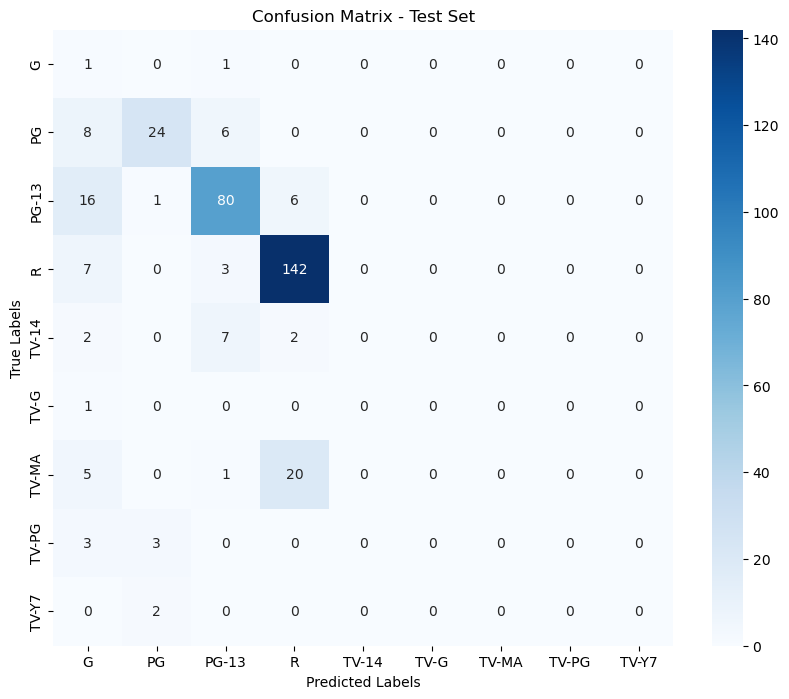

In [40]:
clean_confusion_matrix(columns=y_test.columns, conf_matrix=conf_matrix)

With the results of this confusion matrix, we see that the third category that we predicted very well is the rated R category. The majority of the ones we missed for that were predicted TV-MA which is essentially the TV version of R, so that prediction is really good. The second best was the PG-13 prediction where we got a majority of them correct. The ones we missed were relatively close or were the TV equivalent so overall we are pleased with the results for that prediction. However, the one we did really bad at with this model is predicting G ratings as we had predicted a lot of them for all different types of ratings. There may be some underlying issue with why it's predicting that incorrectly, which may take some more analysis. 

In [41]:

feature_importance = rf_classifier.feature_importances_

feature_names= X_train_scaled.columns

importance_dict = dict(zip(feature_names, feature_importance))

sorted_importance = sorted(importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")

duration_sec_drugs_drugs_legal: 0.11546615749356656
occurrence_cnt_drugs_drugs_legal: 0.10123746137711911
occurrence_cnt_language_profanity: 0.05917454579455958
occurrence_cnt_language_childish_language: 0.054197191051620595
duration_sec_language_profanity: 0.0437344383857937
duration_sec_language_childish_language: 0.032257741797345356
duration_sec_violence_graphic: 0.025933807223776445
occurrence_cnt_violence_graphic: 0.025066571794258183
occurrence_cnt_drugs_drugs_implied: 0.023291626094456435
occurrence_cnt_violence_violence_implied: 0.02309917005241979
year: 0.02200505238837565
duration_sec_violence_violence_implied: 0.019659608777955268
duration_sec_drugs_drugs_implied: 0.0194968700261182
occurrence_cnt_language_blasphemy: 0.019236004583368518
duration_sec: 0.018287965175256844
occurrence_cnt_violence_non_graphic: 0.01661250109940491
duration_sec_violence_non_graphic: 0.01629380403294227
duration_sec_immodesty_nudity_without_sex: 0.014218321884674777
occurrence_cnt_drugs_drugs_il

In [42]:
#CROSS VALIDATION
from sklearn.model_selection import cross_val_score

# Create your Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform 5-fold cross-validation
scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores (Random Forest):", scores)

# Calculate and print the mean accuracy
mean_accuracy = scores.mean()
print("Mean Accuracy (Random Forest):", mean_accuracy)

Cross-Validation Scores (Random Forest): [0.75912409 0.7080292  0.70072993 0.65693431 0.76470588 0.75
 0.80882353 0.69852941 0.71323529 0.73529412]
Mean Accuracy (Random Forest): 0.7295405753542292


## Modeling - SVM<a id='Modeling-SVM'>

In [43]:
#from sklearn.model_selection import KFold
#from sklearn.model_selection import GridSearchCV
#kf = KFold(n_splits=5, shuffle=True, random_state=42)
#param_grid = {'kernel':  ['linear','rbf']
#             , 'C': [0.1, 1, 10, 100]
#             ,'gamma': [0.1, 1, 10]}
#svm_classifier = SVC()
#svm_cv = GridSearchCV(svm_classifier, param_grid, cv=kf)
#multi_output_classifier = MultiOutputClassifier(svm_cv)
#multi_output_classifier.fit(X_train_scaled, y_train)
#print(multi_output_classifier.estimators_[0].best_params_, multi_output_classifier.estimators_[0].best_score_)

In [44]:
c_values = [0.001, 0.01,0.5, 1, 10, 100]
accuracy_scores = []
for C in c_values:
    svm_classifier = SVC(kernel='linear', C=C)
    multi_output_classifier = MultiOutputClassifier(svm_classifier)
    multi_output_classifier.fit(X_train_scaled, y_train)
    y_pred = multi_output_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
# Find the index of the C value with the highest accuracy
best_index = accuracy_scores.index(max(accuracy_scores))
best_C = c_values[best_index]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best C:", best_C)
print("Accuracy:", accuracy)

Best C: 0.01
Accuracy: 0.5454545454545454


In [45]:
# Create an SVM classifier (you can tune hyperparameters as needed)
svm_classifier = SVC(kernel='linear', C=0.1)

# Create a MultiOutputClassifier
multi_output_classifier = MultiOutputClassifier(svm_classifier)

# Train the multi-label classifier on the training data
multi_output_classifier.fit(X_train_scaled, y_train)

# Predict the multi-label classes for X_test_scaled
y_pred = multi_output_classifier.predict(X_test_scaled)

# Evaluate the model (you may need to adapt the evaluation metric to your specific problem)
class_report = classification_report(y_test, y_pred,target_names=class_names,zero_division=1,output_dict=True)  # Use y_test as the true labels
report_df = pd.DataFrame(class_report).transpose()
report_df

,precision,recall,f1-score,support
G,1.000000,0.000000,0.000000,2.0
PG,0.764706,0.684211,0.722222,38.0
PG-13,0.712871,0.699029,0.705882,103.0
R,0.818792,0.802632,0.810631,152.0
TV-14,0.500000,0.181818,0.266667,11.0
TV-G,0.000000,0.000000,0.000000,1.0
TV-MA,0.363636,0.153846,0.216216,26.0
TV-PG,1.000000,0.166667,0.285714,6.0
TV-Y7,0.000000,0.000000,0.000000,2.0
micro avg,0.746711,0.665689,0.703876,341.0


In [46]:
y_test_labels = np.argmax(y_test.values, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

In [47]:
# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.63


In [48]:
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[  1   1   0   0   0   0   0   0   0]
 [  6  26   4   1   0   0   1   0   0]
 [ 22   4  68   7   0   0   1   0   1]
 [ 18   0  17 114   0   0   3   0   0]
 [  7   0   2   0   2   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0]
 [  7   0   1  16   0   0   2   0   0]
 [  3   1   0   0   0   1   0   1   0]
 [  0   2   0   0   0   0   0   0   0]]


<Figure size 640x480 with 0 Axes>

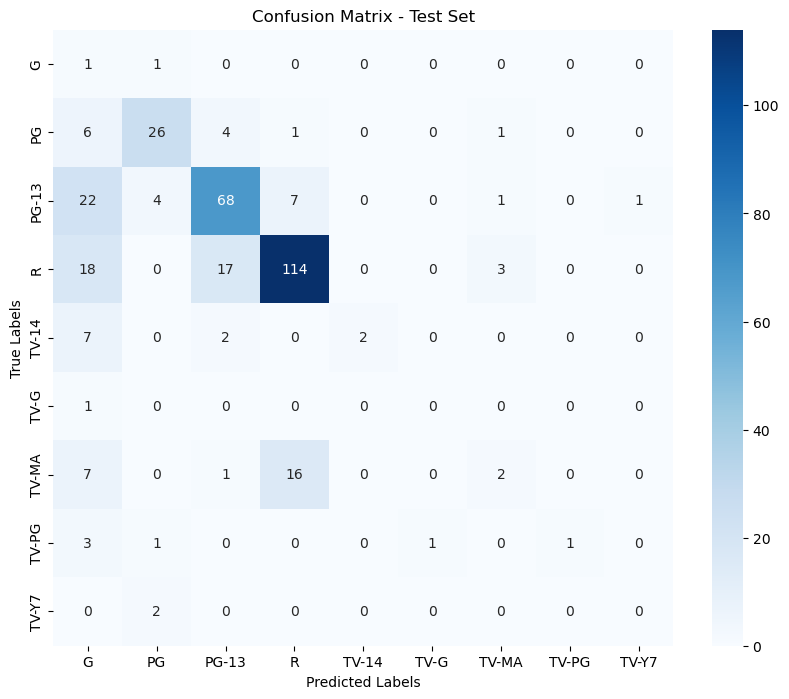

In [49]:
clean_confusion_matrix(columns=y_test.columns, conf_matrix=conf_matrix)

In [50]:
# Create your SVM classifier
svm_classifier = SVC(kernel='linear', C=0.01)

# Create a MultiOutputClassifier
multi_output_classifier = MultiOutputClassifier(svm_classifier)

# Perform 5-fold cross-validation
scores = cross_val_score(multi_output_classifier, X_train_scaled, y_train, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores (SVM):", scores)

# Calculate and print the mean accuracy
mean_accuracy = scores.mean()
print("Mean Accuracy (SVM):", mean_accuracy)

Cross-Validation Scores (SVM): [0.62043796 0.52554745 0.59854015 0.59854015 0.58088235 0.66176471
 0.67647059 0.57352941 0.61764706 0.61029412]
Mean Accuracy (SVM): 0.6063653928724775


## Modeling - Deep Learning <a id='Modeling_Deep_Learning'>

In [51]:
from tensorflow import keras
from tensorflow.keras import layers

In [52]:
input_shape = (232,)
num_classes = 9

model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [53]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
epochs = 50
batch_size = 32

history = model.fit(X_train_scaled, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test_scaled, y_test))

Epoch 1/50
43/43 [==============================] - 1s 5ms/step - loss: 2.0193 - accuracy: 0.3827 - val_loss: 1.2718 - val_accuracy: 0.6100
Epoch 2/50
43/43 [==============================] - 0s 2ms/step - loss: 1.2820 - accuracy: 0.6144 - val_loss: 1.0590 - val_accuracy: 0.6686
Epoch 3/50
43/43 [==============================] - 0s 2ms/step - loss: 1.0223 - accuracy: 0.6884 - val_loss: 0.9776 - val_accuracy: 0.6804
Epoch 4/50
43/43 [==============================] - 0s 2ms/step - loss: 0.9094 - accuracy: 0.7082 - val_loss: 0.9263 - val_accuracy: 0.6862
Epoch 5/50
43/43 [==============================] - 0s 2ms/step - loss: 0.7851 - accuracy: 0.7463 - val_loss: 0.9051 - val_accuracy: 0.7067
Epoch 6/50
43/43 [==============================] - 0s 2ms/step - loss: 0.7265 - accuracy: 0.7639 - val_loss: 0.8961 - val_accuracy: 0.7126
Epoch 7/50
43/43 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.7698 - val_loss: 0.8873 - val_accuracy: 0.7126
Epoch 8/50
43/43 [==

In [55]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy}")

11/11 [==============================] - 0s 1ms/step - loss: 1.1657 - accuracy: 0.7566
Test Accuracy: 0.7565982341766357


In [56]:
y_pred = model.predict(X_test_scaled)

11/11 [==============================] - 0s 1ms/step


In [57]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test.values, axis=1)

In [58]:
y_test_labels

array([3, 1, 3, 3, 2, 3, 3, 2, 1, 3, 2, 2, 6, 4, 1, 3, 1, 2, 2, 3, 2, 3,
       1, 3, 3, 3, 6, 3, 3, 2, 2, 3, 4, 2, 3, 3, 3, 3, 3, 1, 7, 1, 6, 3,
       3, 2, 6, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 4, 3, 3, 2, 2, 1, 7,
       3, 2, 2, 2, 6, 2, 3, 2, 1, 2, 2, 3, 1, 1, 7, 6, 2, 3, 3, 1, 3, 2,
       3, 1, 3, 3, 2, 2, 3, 2, 1, 3, 6, 3, 3, 2, 2, 6, 2, 2, 3, 3, 3, 2,
       7, 2, 1, 3, 6, 3, 6, 6, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 6, 3,
       1, 6, 2, 3, 3, 3, 2, 2, 3, 2, 6, 3, 2, 2, 3, 2, 3, 1, 2, 3, 3, 4,
       3, 3, 3, 2, 2, 3, 3, 3, 7, 2, 2, 3, 3, 1, 0, 6, 3, 2, 3, 6, 1, 2,
       2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 1, 3, 3, 3, 1, 2, 3, 1, 2,
       2, 3, 2, 1, 3, 3, 2, 2, 1, 2, 6, 1, 2, 2, 2, 2, 6, 3, 3, 8, 4, 4,
       1, 3, 3, 2, 6, 2, 2, 2, 1, 0, 3, 3, 3, 2, 2, 6, 1, 2, 4, 3, 6, 2,
       3, 3, 3, 3, 1, 3, 2, 2, 3, 4, 3, 3, 3, 3, 4, 2, 3, 3, 3, 3, 3, 2,
       1, 2, 3, 2, 3, 2, 2, 1, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 6,
       3, 3, 3, 1, 4, 6, 2, 3, 6, 3, 6, 3, 3, 3, 2,

In [59]:
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
conf_matrix

array([[  0,   1,   0,   0,   0,   1,   0,   0,   0],
       [  0,  29,   6,   1,   0,   0,   0,   2,   0],
       [  0,   1,  80,  21,   0,   0,   1,   0,   0],
       [  0,   1,  12, 132,   2,   0,   5,   0,   0],
       [  0,   0,   4,   1,   5,   0,   1,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  17,   0,   0,   9,   0,   0],
       [  0,   2,   0,   0,   0,   1,   0,   3,   0],
       [  0,   2,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

<Figure size 640x480 with 0 Axes>

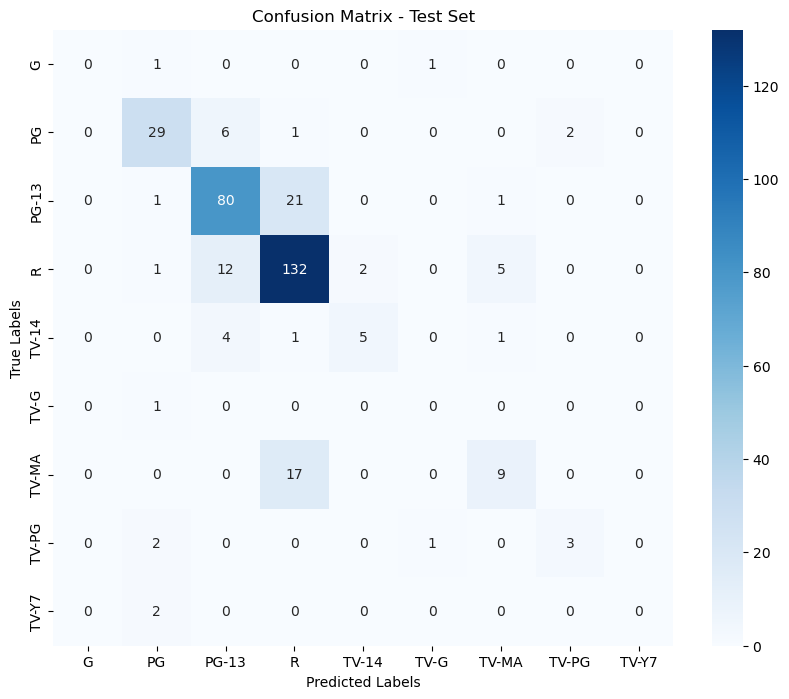

In [60]:
clean_confusion_matrix(columns=y_test.columns, conf_matrix=conf_matrix)

# SEE WHY G IS BEING GUESSED SO MUCH BY THE FIRST TWO MODELS

In [61]:
y_test.head(40)

,G,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y7
631,0,0,0,1,0,0,0,0,0
22,0,1,0,0,0,0,0,0,0
273,0,0,0,1,0,0,0,0,0
1701,0,0,0,1,0,0,0,0,0
92,0,0,1,0,0,0,0,0,0
1296,0,0,0,1,0,0,0,0,0
730,0,0,0,1,0,0,0,0,0
197,0,0,1,0,0,0,0,0,0
1617,0,1,0,0,0,0,0,0,0
358,0,0,0,1,0,0,0,0,0


In [62]:
movies_studio_combined[movies_studio_combined['imdb_id'] == 'tt4581576']#.iloc[686]

,imdb_id,name,year,mpaa_rating,duration_sec,studio,number_of_studios,duration_sec_drugs_drugs_illegal,duration_sec_drugs_drugs_implied,duration_sec_drugs_drugs_legal,...,Studio_Vertical Entertainment,Studio_Vinson Films,Studio_Voltage Pictures,Studio_Walden Media,Studio_Weinstein Company,Studio_Will Packer Productions,Studio_Wonderland Sound and Vision,Studio_Working Title Films,Studio_XYZ Films,Studio_Zero Gravity Management
686,tt4581576,Aftermath,2017,R,5520,Other,1,78.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
